<div style="text-align: center;">
  <h1>Transaction Success Rate Optimization</h1>
  <h2>Data Exploration</h2>
  <img src="imgs/3556940.jpg" alt="Transaction Analysis Overview" width="1000" height="500"/>
  <p>
    <a href="http://www.freepik.com">Designed by slidesgo / Freepik</a>
  </p>
</div>



### Author: Umar Kabir
#### Date: March 17, 2025

## 1. Setup
### 1.1 Import Libraries

In [14]:

import sys
import os

# Get the absolute path of the parent directory
sys.path.insert(0, os.path.abspath('../'))

# import the necessary packages
from src.dependencies import *
from src.utils import *


### 1.2 Data Loading and Exploration

In [15]:
# Transaction Failure Analysis & Visualization

try:
    # Attempt to load the data from a CSV file
    transactions_df = pd.read_csv('../data/processed/full_feature_engineered_data.csv')
    print("Data loaded successfully from CSV file.")
except FileNotFoundError:
    # If file not found, create a sample dataset for demonstration
    print("CSV file not found. Try creating a sample dataset using data_generator.py in the src directory.")

# Display the first few rows of the dataset
transactions_df.head()



Data loaded successfully from CSV file.


,transaction_id,timestamp,merchant_id,customer_id,customer_location,payment_amount,payment_method,device_type,network_latency,result,...,latency_bin_encoded,network_latency_scaled,merchant_rolling_avg_amount_scaled,merchant_success_rate_scaled,device_success_rate_scaled,payment_method_rolling_success_scaled,location_success_rate_scaled,payment_location_success_rate_scaled,merchant_transaction_count_log,hourly_transaction_volume_log
0,500399ad-7770-4e89-bebe-ae7ce7b4fc02,2023-03-01 10:15:25,MERCH00045,CUST000629,urban,16.33,bank_transfer,web,121.33,success,...,3,0.165873,0.031360,0.851562,1.0,NaN,0.98617,0.710078,3.891820,5.826000
1,62b96b0b-f757-4bef-99b8-7592d3305637,2023-03-01 13:19:24,MERCH00047,CUST000849,urban,8.53,bank_transfer,mobile,56.36,success,...,2,-0.551120,0.055035,0.554688,0.0,NaN,0.98617,0.710078,3.891820,5.726848
2,82e6eacc-7f94-49a8-b47f-075b6ddeaa1a,2023-03-01 14:14:33,MERCH00017,CUST000751,suburban,7.24,bank_transfer,web,56.45,success,...,2,-0.550127,0.030021,1.000000,1.0,NaN,1.00000,0.866384,3.850148,5.886104
3,0c53cb08-3f45-43bb-b437-bbe9cc52ff0f,2023-03-01 14:22:34,MERCH00073,CUST000868,urban,23.61,bank_transfer,web,151.11,success,...,4,0.494518,0.133990,0.508621,1.0,NaN,0.98617,0.710078,4.077537,5.886104
4,24e14a9b-91ff-459e-820a-4ece0a28a722,2023-03-02 05:41:33,MERCH00009,CUST000062,rural,25.40,bank_transfer,web,186.90,success,...,4,0.889488,0.055429,0.720588,1.0,1.0,0.00000,1.000000,3.951244,5.176150


In [16]:
# Check dataframe information
print("Dataset Information:")
print(f"Number of transactions: {transactions_df.shape[0]}")
print(f"Number of columns: {transactions_df.shape[1]}")
print("\nColumns and their types:")
print(transactions_df.dtypes)


Dataset Information:
Number of transactions: 5463
Number of columns: 70

Columns and their types:
transaction_id                            object
timestamp                                 object
merchant_id                               object
customer_id                               object
customer_location                         object
                                          ...   
payment_method_rolling_success_scaled    float64
location_success_rate_scaled             float64
payment_location_success_rate_scaled     float64
merchant_transaction_count_log           float64
hourly_transaction_volume_log            float64
Length: 70, dtype: object


In [17]:

# Check for missing values
print("\nMissing values in each column:")
print(transactions_df.isnull().sum())



Missing values in each column:
transaction_id                            0
timestamp                                 0
merchant_id                               0
customer_id                               0
customer_location                         0
                                         ..
payment_method_rolling_success_scaled    20
location_success_rate_scaled              0
payment_location_success_rate_scaled      0
merchant_transaction_count_log            0
hourly_transaction_volume_log             0
Length: 70, dtype: int64


In [18]:

# Display basic statistics
print("\nBasic statistics of numerical columns:")
print(transactions_df.describe())



Basic statistics of numerical columns:
       payment_amount  network_latency  day_of_week  retry_count  \
count     5463.000000      5463.000000  5463.000000  5463.000000   
mean        55.253092       106.299507     3.383123     0.038074   
std         69.651820        90.622800     1.975552     0.300762   
min          0.630000         1.030000     0.000000     0.000000   
25%         16.675000        46.335000     2.000000     0.000000   
50%         33.370000        80.620000     4.000000     0.000000   
75%         66.560000       136.865000     5.000000     0.000000   
max        883.700000       417.455200     6.000000     4.000000   

       merchant_transaction_count  result_numeric  merchant_success_rate  \
count                 5463.000000     5463.000000            5463.000000   
mean                    55.517298        0.936116               0.936116   
std                      7.188447        0.244569               0.032706   
min                     41.000000        0.

In [19]:

# Count of successful vs. failed transactions
status_counts = transactions_df['result'].value_counts()
failure_rate = status_counts['failure'] / status_counts.sum() * 100

print(f"\nSuccess vs. Failure Counts:")
print(status_counts)
print(f"Overall Failure Rate: {failure_rate:.2f}%")




Success vs. Failure Counts:
result
success    5114
failure     349
Name: count, dtype: int64
Overall Failure Rate: 6.39%


### 1.3 Data Preprocessing

In [28]:
# Extract time-based features
transactions_df['timestamp'] = pd.to_datetime(transactions_df['timestamp'])
transactions_df['date'] = transactions_df['timestamp'].dt.date
transactions_df['hour'] = transactions_df['timestamp'].dt.hour
transactions_df['day_of_week'] = transactions_df['timestamp'].dt.day_name()
transactions_df['day_num'] = transactions_df['timestamp'].dt.dayofweek  # 0 = Monday, 6 = Sunday
transactions_df['week'] = transactions_df['timestamp'].dt.isocalendar().week
transactions_df['month'] = transactions_df['timestamp'].dt.month
transactions_df['is_weekend'] = transactions_df['day_num'].isin([5, 6]).astype(int)

# Convert status to binary for easier analysis
transactions_df['is_failure'] = (transactions_df['result'] == 'failure').astype(int)

# For boxplots later, create merchant IDs numerical
transactions_df['merchant_id_num'] = transactions_df['merchant_id'].str.extract('(\d+)').astype(int)

# Display the modified dataframe
transactions_df.head()

,transaction_id,timestamp,merchant_id,customer_id,customer_location,payment_amount,payment_method,device_type,network_latency,result,...,payment_method_rolling_success_scaled,location_success_rate_scaled,payment_location_success_rate_scaled,merchant_transaction_count_log,hourly_transaction_volume_log,date,day_num,week,merchant_id_num,is_failure
0,500399ad-7770-4e89-bebe-ae7ce7b4fc02,2023-03-01 10:15:25,MERCH00045,CUST000629,urban,16.33,bank_transfer,web,121.33,success,...,NaN,0.98617,0.710078,3.891820,5.826000,2023-03-01,2,9,45,0
1,62b96b0b-f757-4bef-99b8-7592d3305637,2023-03-01 13:19:24,MERCH00047,CUST000849,urban,8.53,bank_transfer,mobile,56.36,success,...,NaN,0.98617,0.710078,3.891820,5.726848,2023-03-01,2,9,47,0
2,82e6eacc-7f94-49a8-b47f-075b6ddeaa1a,2023-03-01 14:14:33,MERCH00017,CUST000751,suburban,7.24,bank_transfer,web,56.45,success,...,NaN,1.00000,0.866384,3.850148,5.886104,2023-03-01,2,9,17,0
3,0c53cb08-3f45-43bb-b437-bbe9cc52ff0f,2023-03-01 14:22:34,MERCH00073,CUST000868,urban,23.61,bank_transfer,web,151.11,success,...,NaN,0.98617,0.710078,4.077537,5.886104,2023-03-01,2,9,73,0
4,24e14a9b-91ff-459e-820a-4ece0a28a722,2023-03-02 05:41:33,MERCH00009,CUST000062,rural,25.40,bank_transfer,web,186.90,success,...,1.0,0.00000,1.000000,3.951244,5.176150,2023-03-02,3,9,9,0


## 2. Analysis of Transaction Failures

### 2.1 Common Failure Causes


Most Common Error Codes:


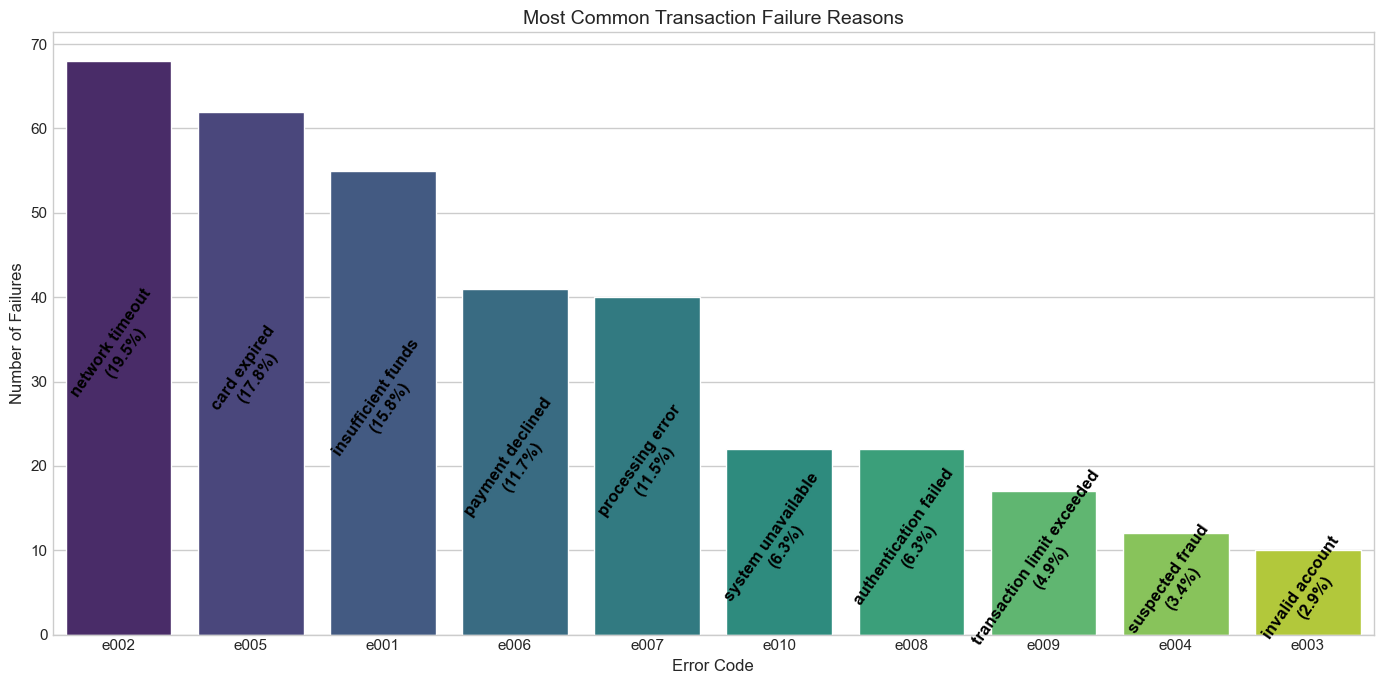

In [26]:
# Filter failed transactions
failed_txns = transactions_df[transactions_df['result'] == 'failure']

# Count of error codes
error_counts = failed_txns['error_code'].value_counts()
error_pct = (error_counts / error_counts.sum() * 100).round(1)

# Create a dataframe for visualization
error_df = pd.DataFrame({
    'Count': error_counts,
    'Percentage': error_pct,
    'Description': [failed_txns[failed_txns['error_code'] == code]['failure_reason'].iloc[0] 
                    for code in error_counts.index]
}).reset_index().rename(columns={'index': 'Error Code'})

# Sort by count in descending order
error_df = error_df.sort_values('Count', ascending=False)

# Display the table of error codes
print("Most Common Error Codes:")
error_df

# Visualize the most common error codes and reasons
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='error_code', y='Count', data=error_df, palette='viridis')

# Add error descriptions as annotations
for i, row in enumerate(error_df.itertuples()):
    plt.text(i, row.Count/2, f"{row.Description}\n({row.Percentage}%)", 
             ha='center', va='center', color='black', fontweight='bold', rotation=55)

plt.title('Most Common Transaction Failure Reasons', fontsize=14)
plt.xlabel('Error Code', fontsize=12)
plt.ylabel('Number of Failures', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 2.2 Failure Distribution by Payment Method

Failure Rates by Payment Method:


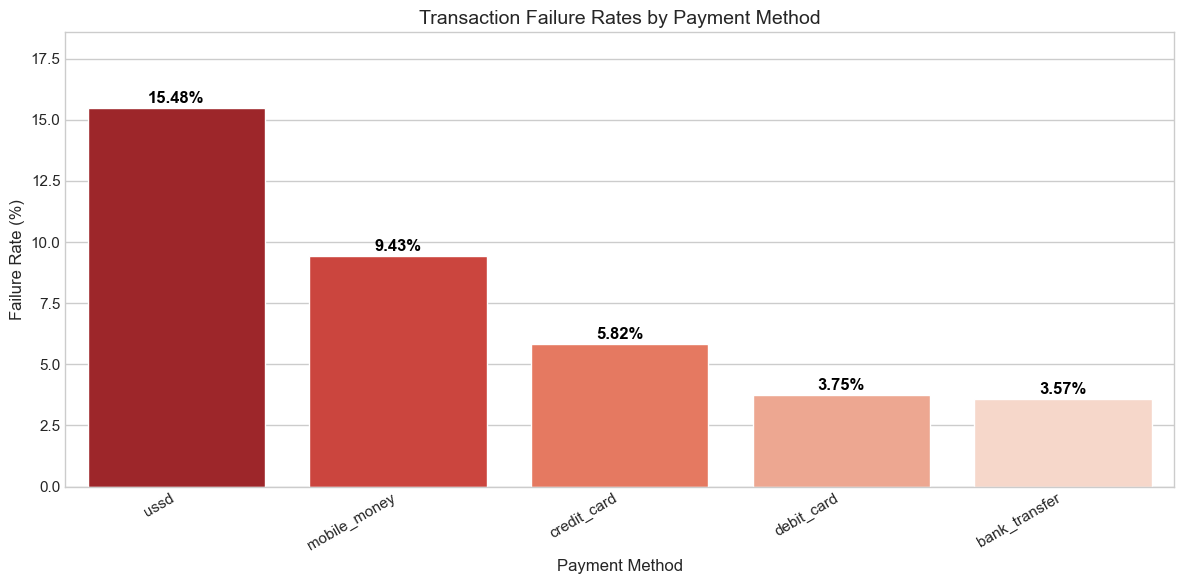

In [29]:
# Calculate failure rates by payment method
payment_failure = transactions_df.groupby('payment_method').agg(
    total_transactions=('transaction_id', 'count'),
    failed_transactions=('is_failure', 'sum')
).reset_index()

payment_failure['failure_rate'] = (payment_failure['failed_transactions'] / 
                                payment_failure['total_transactions'] * 100).round(2)

payment_failure = payment_failure.sort_values('failure_rate', ascending=False)

# Display the table
print("Failure Rates by Payment Method:")
payment_failure

# Visualize failure rates by payment method
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='payment_method', y='failure_rate', data=payment_failure, palette='Reds_r')

# Add percentage annotations
for i, row in enumerate(payment_failure.itertuples()):
    plt.text(i, row.failure_rate + 0.2, f"{row.failure_rate}%", 
             ha='center', color='black', fontweight='bold')

plt.title('Transaction Failure Rates by Payment Method', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Failure Rate (%)', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.ylim(0, max(payment_failure['failure_rate']) * 1.2)
plt.tight_layout()
plt.show()

### 2.3 Error Code Distribution by Payment Method

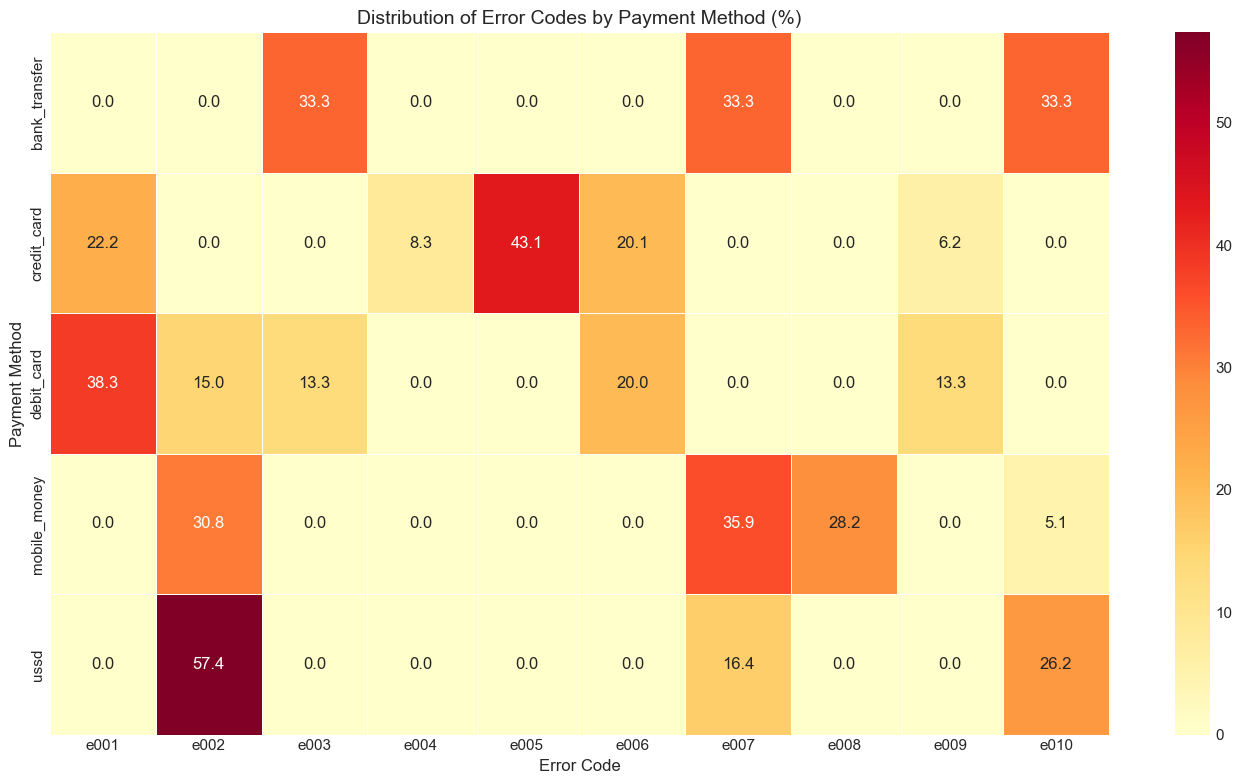

In [30]:
# Create a cross-tabulation of payment methods and error codes
error_by_payment = pd.crosstab(failed_txns['payment_method'], failed_txns['error_code'], 
                             normalize='index') * 100

# Plot the distribution of error codes by payment method
plt.figure(figsize=(14, 8))
ax = sns.heatmap(error_by_payment, annot=True, fmt='.1f', cmap='YlOrRd', linewidths=0.5)
plt.title('Distribution of Error Codes by Payment Method (%)', fontsize=14)
plt.ylabel('Payment Method', fontsize=12)
plt.xlabel('Error Code', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 2.4 Failure Trends by Processor

Failure Rates by Processor:


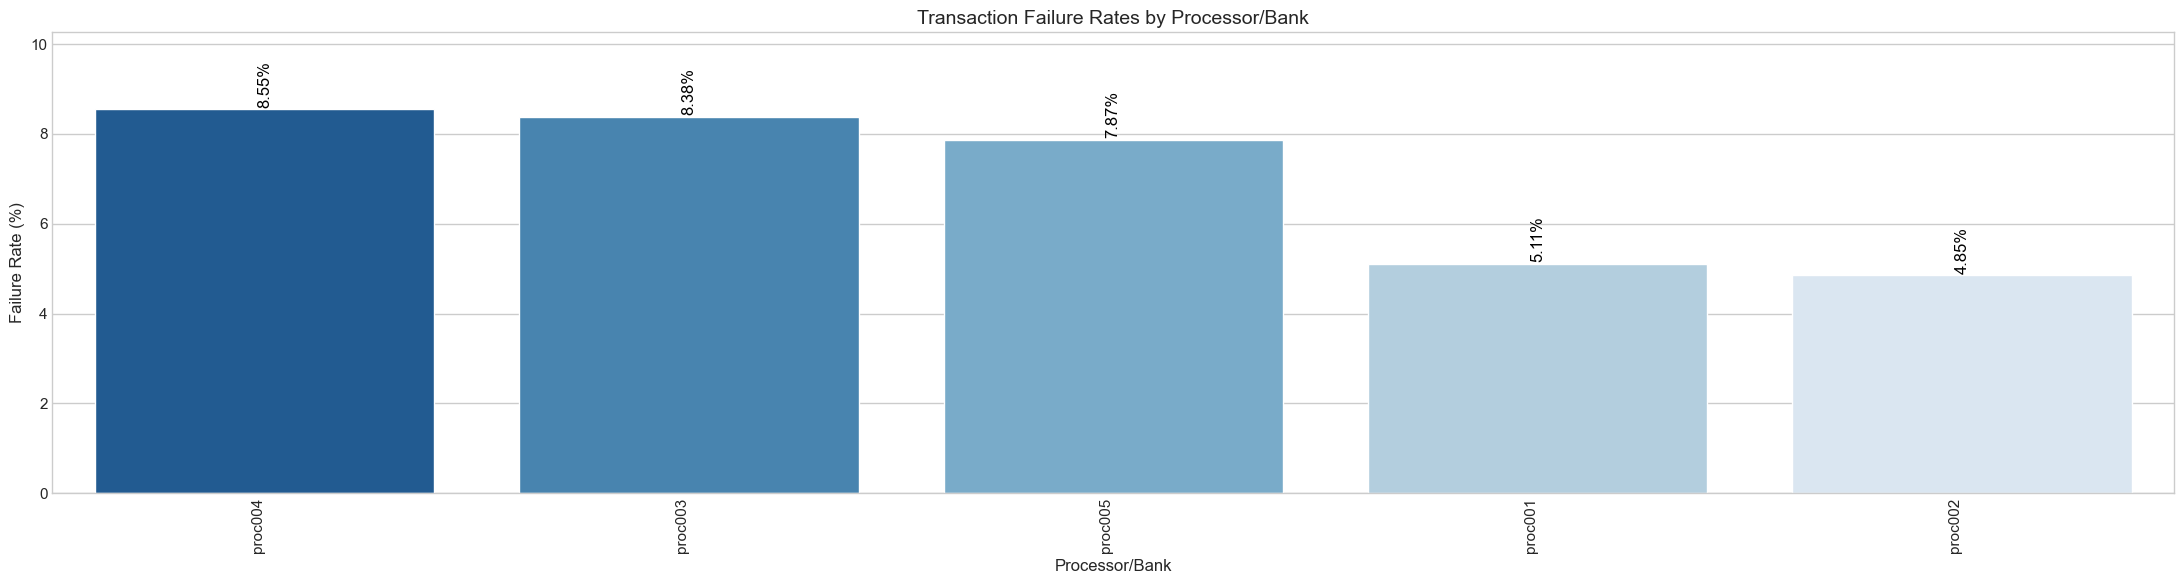

In [90]:
# Calculate failure rates by processor
processor_failure = transactions_df.groupby('processor_id').agg(
    total_transactions=('transaction_id', 'count'),
    failed_transactions=('is_failure', 'sum')
).reset_index()

processor_failure['failure_rate'] = (processor_failure['failed_transactions'] / 
                                  processor_failure['total_transactions'] * 100).round(2)

processor_failure = processor_failure.sort_values('failure_rate', ascending=False)

# Display the table
print("Failure Rates by Processor:")
processor_failure


# Visualize failure rates by processor
plt.figure(figsize=(22, 6))
ax = sns.barplot(x='processor_id', y='failure_rate', data=processor_failure, palette='Blues_r')

# Add percentage annotations
for i, row in enumerate(processor_failure.itertuples()):
    plt.text(i, row.failure_rate + 0.1, f"{row.failure_rate}%", 
             ha='center', color='black', fontweight='normal', rotation=90)

plt.title('Transaction Failure Rates by Processor/Bank', fontsize=14)
plt.xlabel('Processor/Bank', fontsize=12)
plt.ylabel('Failure Rate (%)', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.ylim(0, max(processor_failure['failure_rate']) * 1.2)
plt.tight_layout()
plt.show()

### 2.5 Locational Transaction Failures

Failure Rates by customer_location:


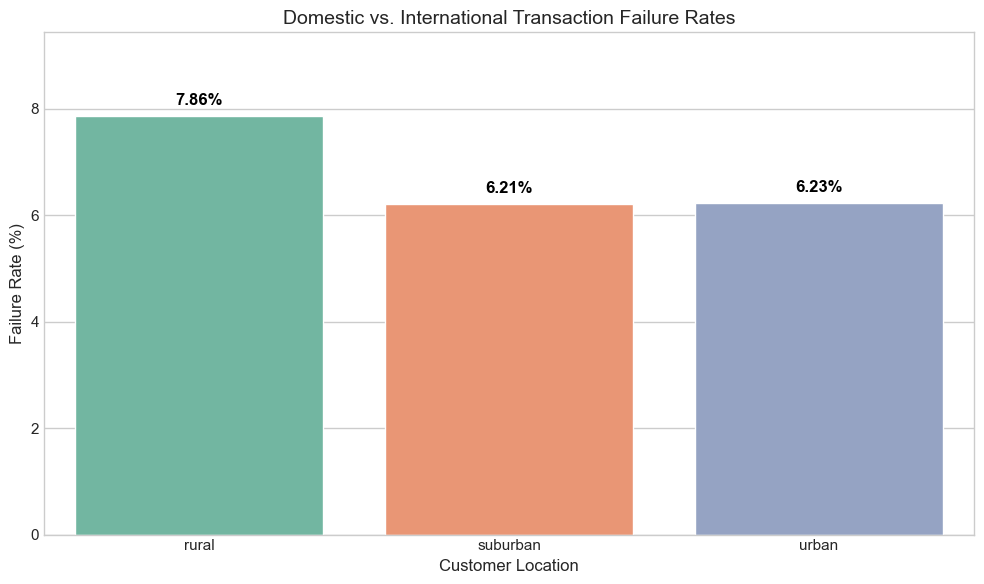

In [39]:
# Calculate failure rates for domestic vs. international transactions
customer_location_failure = transactions_df.groupby('customer_location').agg(
    total_transactions=('transaction_id', 'count'),
    failed_transactions=('is_failure', 'sum')
).reset_index()

customer_location_failure['failure_rate'] = (customer_location_failure['failed_transactions'] / 
                               customer_location_failure['total_transactions'] * 100).round(2)

# Display the table
print("Failure Rates by customer_location:")
customer_location_failure


# Visualize domestic vs. international failure rates
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='customer_location', y='failure_rate', data=customer_location_failure, palette='Set2')

# Add percentage annotations
for i, row in enumerate(customer_location_failure.itertuples()):
    plt.text(i, row.failure_rate + 0.2, f"{row.failure_rate}%", 
             ha='center', color='black', fontweight='bold')

plt.title('Location Transaction Failure Rates', fontsize=14)
plt.xlabel('Customer Location', fontsize=12)
plt.ylabel('Failure Rate (%)', fontsize=12)
plt.ylim(0, max(customer_location_failure['failure_rate']) * 1.2)
plt.tight_layout()
plt.show()

## 3. Statistical Insights & Trend Analysis

### 3.1 Time-Based Failure Patterns

Failure Rates by Hour of Day:


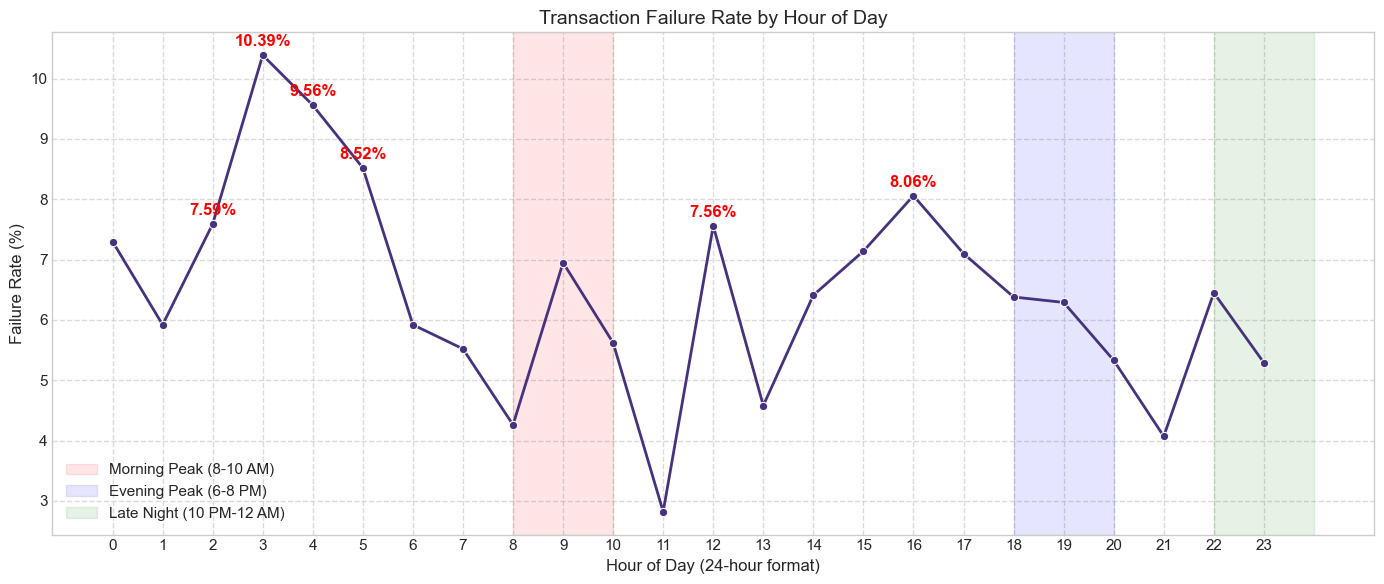

In [40]:
# Calculate failure rates by hour of the day
hourly_failure = transactions_df.groupby('hour').agg(
    total_transactions=('transaction_id', 'count'),
    failed_transactions=('is_failure', 'sum')
).reset_index()

hourly_failure['failure_rate'] = (hourly_failure['failed_transactions'] / 
                               hourly_failure['total_transactions'] * 100).round(2)

# Display the table
print("Failure Rates by Hour of Day:")
hourly_failure


# Plot failure rates by hour
plt.figure(figsize=(14, 6))
ax = sns.lineplot(x='hour', y='failure_rate', data=hourly_failure, marker='o', linewidth=2)

# Add annotations for peak hours
peak_hours = hourly_failure[hourly_failure['failure_rate'] >= hourly_failure['failure_rate'].quantile(0.75)]
for _, row in peak_hours.iterrows():
    plt.text(row['hour'], row['failure_rate'] + 0.1, f"{row['failure_rate']}%", 
             ha='center', va='bottom', color='red', fontweight='bold')

plt.title('Transaction Failure Rate by Hour of Day', fontsize=14)
plt.xlabel('Hour of Day (24-hour format)', fontsize=12)
plt.ylabel('Failure Rate (%)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)

# Add reference lines for "peak hours"
plt.axvspan(8, 10, alpha=0.1, color='red', label='Morning Peak (8-10 AM)')
plt.axvspan(18, 20, alpha=0.1, color='blue', label='Evening Peak (6-8 PM)')
plt.axvspan(22, 24, alpha=0.1, color='green', label='Late Night (10 PM-12 AM)')
plt.legend()
plt.tight_layout()
plt.show()

### 3.2 Day of Week Analysis


Failure Rates by Day of Week:


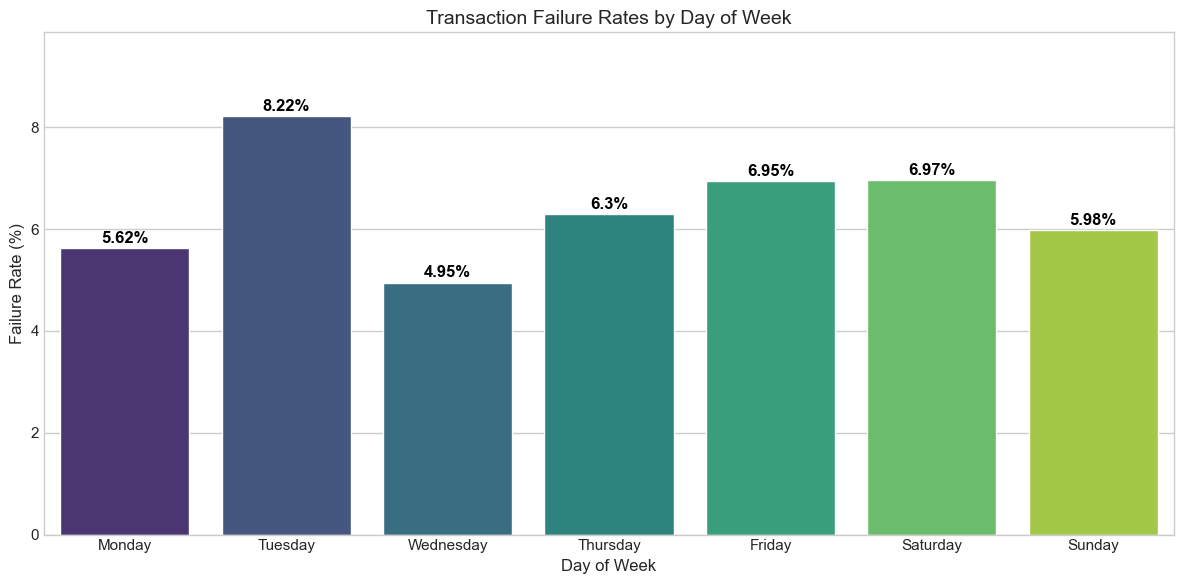

In [41]:


# Define order of days for consistency
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate failure rates by day of the week
daily_failure = transactions_df.groupby('day_of_week').agg(
    total_transactions=('transaction_id', 'count'),
    failed_transactions=('is_failure', 'sum')
).reset_index()

daily_failure['failure_rate'] = (daily_failure['failed_transactions'] / 
                              daily_failure['total_transactions'] * 100).round(2)

# Reorder days correctly
daily_failure['day_of_week'] = pd.Categorical(daily_failure['day_of_week'], categories=day_order, ordered=True)
daily_failure = daily_failure.sort_values('day_of_week')

# Display the table
print("Failure Rates by Day of Week:")
daily_failure


# Plot failure rates by day of week
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='day_of_week', y='failure_rate', data=daily_failure, palette='viridis')

# Add percentage annotations
for i, row in enumerate(daily_failure.itertuples()):
    plt.text(i, row.failure_rate + 0.1, f"{row.failure_rate}%", 
             ha='center', color='black', fontweight='bold')

plt.title('Transaction Failure Rates by Day of Week', fontsize=14)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Failure Rate (%)', fontsize=12)
plt.ylim(0, max(daily_failure['failure_rate']) * 1.2)
plt.tight_layout()
plt.show()

### 3.3 Heatmap for Time-Based Failure Analysis

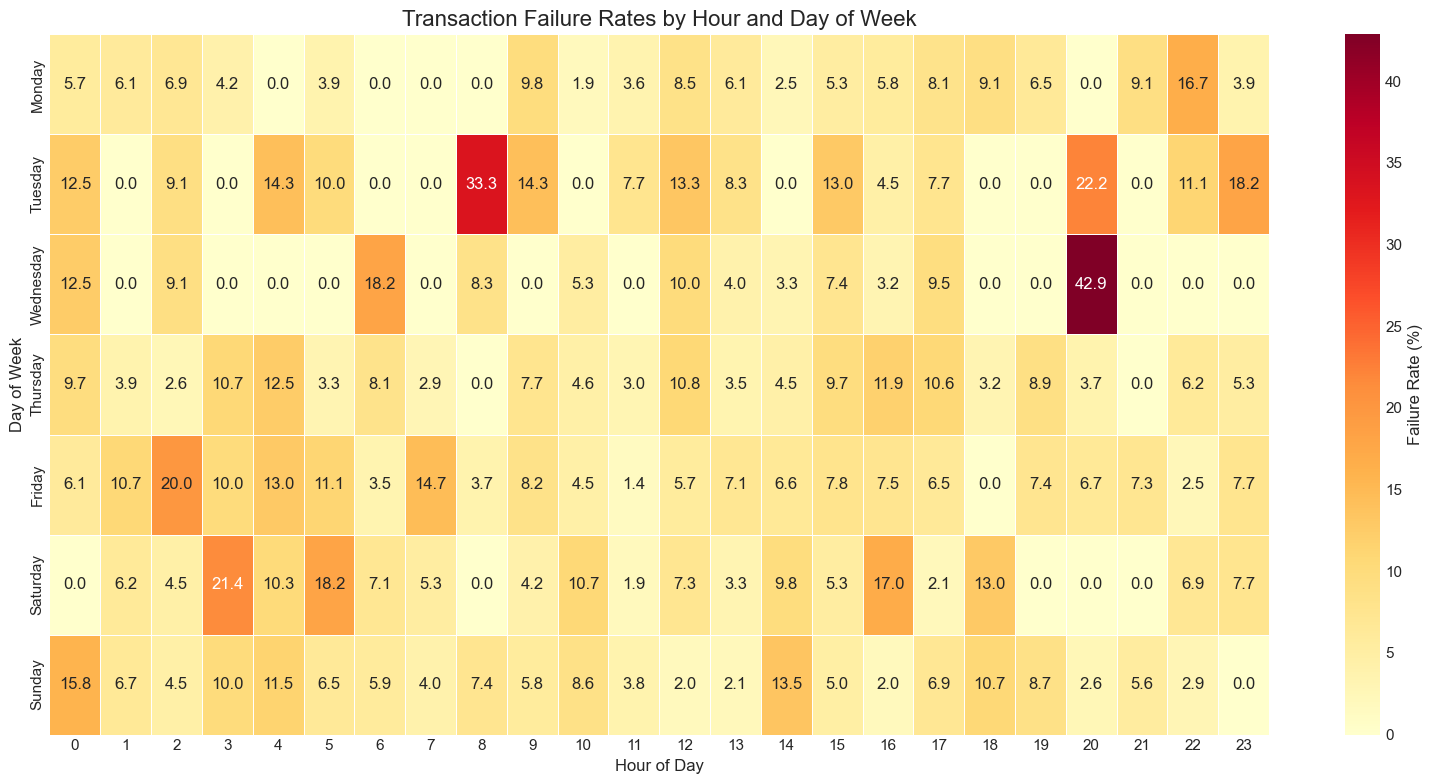

In [ ]:
# Create a pivot table for hour-of-day vs day-of-week failure rates
# First, ensure we have data for all hour-day combinations
hour_day_failures = transactions_df.groupby(['day_of_week', 'hour']).agg(
    failed=('is_failure', 'sum'),
    total=('is_failure', 'count')
).reset_index()

hour_day_failures['failure_rate'] = (hour_day_failures['failed'] / hour_day_failures['total'] * 100).round(2)

# Convert to pivot table for heatmap
heatmap_data = hour_day_failures.pivot(index='day_of_week', columns='hour', values='failure_rate')

# Reorder days correctly
heatmap_data = heatmap_data.reindex(day_order)

# Create the heatmap
plt.figure(figsize=(16, 8))
ax = sns.heatmap(heatmap_data, annot=True, fmt='.1f', linewidths=0.5, cmap='YlOrRd', 
                 cbar_kws={'label': 'Failure Rate (%)'})

plt.title('Transaction Failure Rates by Hour and Day of Week', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.tight_layout()
plt.show()



### 3.4 Bank/Processor Analysis with Hypothesis Testing

In [49]:
# Prepare data for hypothesis testing
# Create a contingency table of success/failure by merchant_id
contingency_table = pd.crosstab(transactions_df['merchant_id'], transactions_df['result'])

# Display the contingency table
print("Contingency Table (Success/Failure by Processor):")
contingency_table


# Conduct Chi-square test to determine if failure rates significantly differ by merchant_id
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p:.6f}")
print(f"Degrees of freedom: {dof}")

# Interpret the results
alpha = 0.05
if p < alpha:
    print(f"\nThe p-value ({p:.6f}) is less than the significance level ({alpha})")
    print("Conclusion: There is a statistically significant difference in failure rates among processors.")
else:
    print(f"\nThe p-value ({p:.6f}) is greater than the significance level ({alpha})")
    print("Conclusion: There is no statistically significant difference in failure rates among processors.")



Contingency Table (Success/Failure by Processor):
Chi-square statistic: 97.70
p-value: 0.518088
Degrees of freedom: 99

The p-value (0.518088) is greater than the significance level (0.05)
Conclusion: There is no statistically significant difference in failure rates among processors.


### 3.5 Payment Method Analysis

Failure Rates by Payment Method:


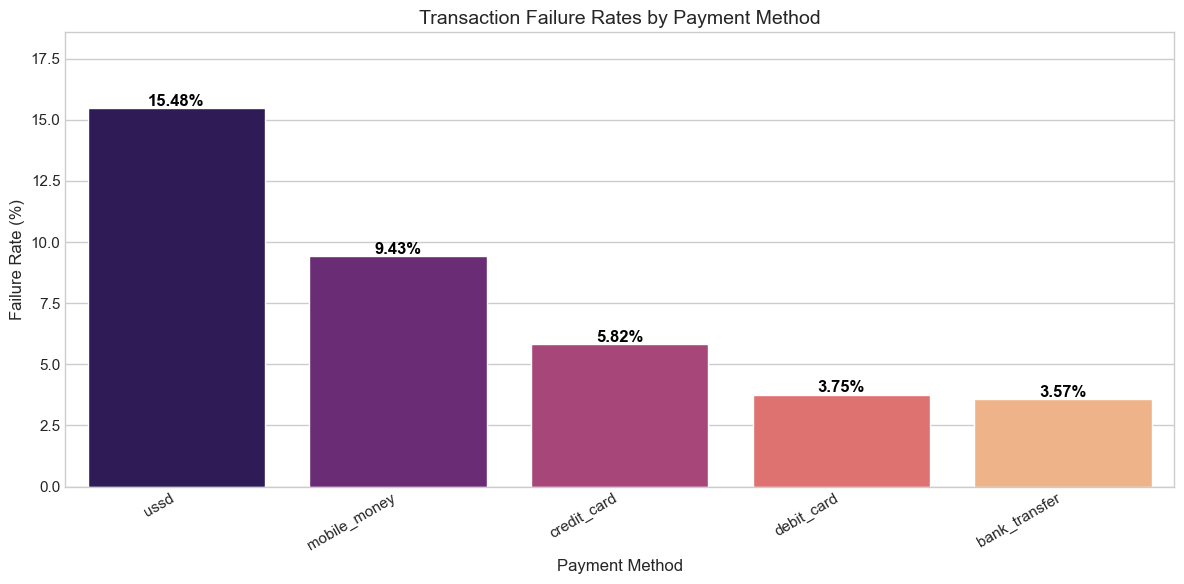

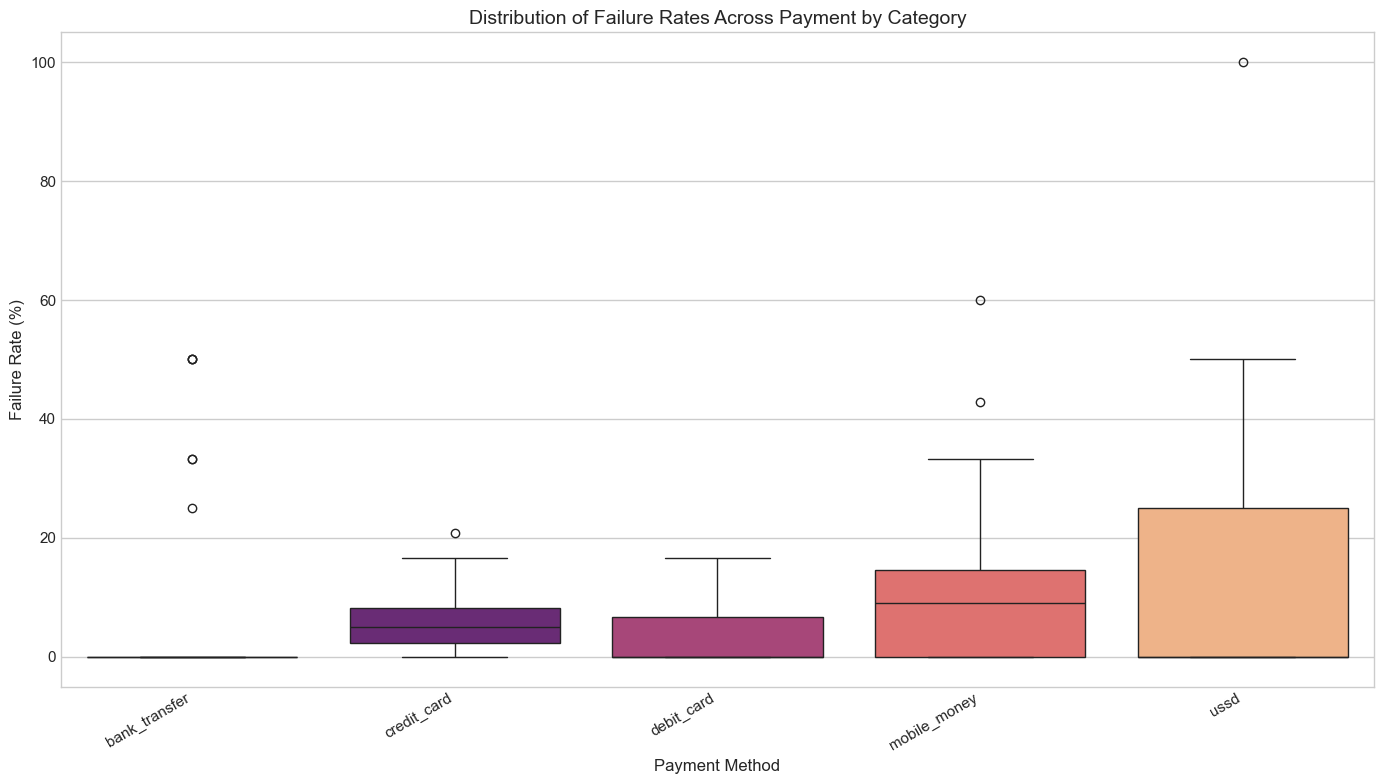

In [92]:
# Calculate failure rates by Payment Method
merchant_cat_failure = transactions_df.groupby('payment_method').agg(
    total_transactions=('transaction_id', 'count'),
    failed_transactions=('is_failure', 'sum')
).reset_index()

merchant_cat_failure['failure_rate'] = (merchant_cat_failure['failed_transactions'] / 
                                     merchant_cat_failure['total_transactions'] * 100).round(2)

merchant_cat_failure = merchant_cat_failure.sort_values('failure_rate', ascending=False)

# Display the table
print("Failure Rates by Payment Method:")
merchant_cat_failure


# Visualize failure rates by Payment Method
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='payment_method', y='failure_rate', data=merchant_cat_failure, palette='magma')

# Add percentage annotations
for i, row in enumerate(merchant_cat_failure.itertuples()):
    plt.text(i, row.failure_rate + 0.1, f"{row.failure_rate}%", 
             ha='center', color='black', fontweight='bold')

plt.title('Transaction Failure Rates by Payment Method', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Failure Rate (%)', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.ylim(0, max(merchant_cat_failure['failure_rate']) * 1.2)
plt.tight_layout()
plt.show()


# Create boxplots for failure rates by Payment Method
# First, aggregate data at merchant level
merchant_failure = transactions_df.groupby(['payment_method', 'merchant_id']).agg(
    total_transactions=('transaction_id', 'count'),
    failed_transactions=('is_failure', 'sum')
).reset_index()

merchant_failure['failure_rate'] = (merchant_failure['failed_transactions'] / 
                                 merchant_failure['total_transactions'] * 100).round(2)

# Create boxplot
plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='payment_method', y='failure_rate', data=merchant_failure, palette='magma')

plt.title('Distribution of Failure Rates Across Payment by Category', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Failure Rate (%)', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()



### 3.6 Transaction Amount Analysis

Failure Rates by Transaction Amount Range:


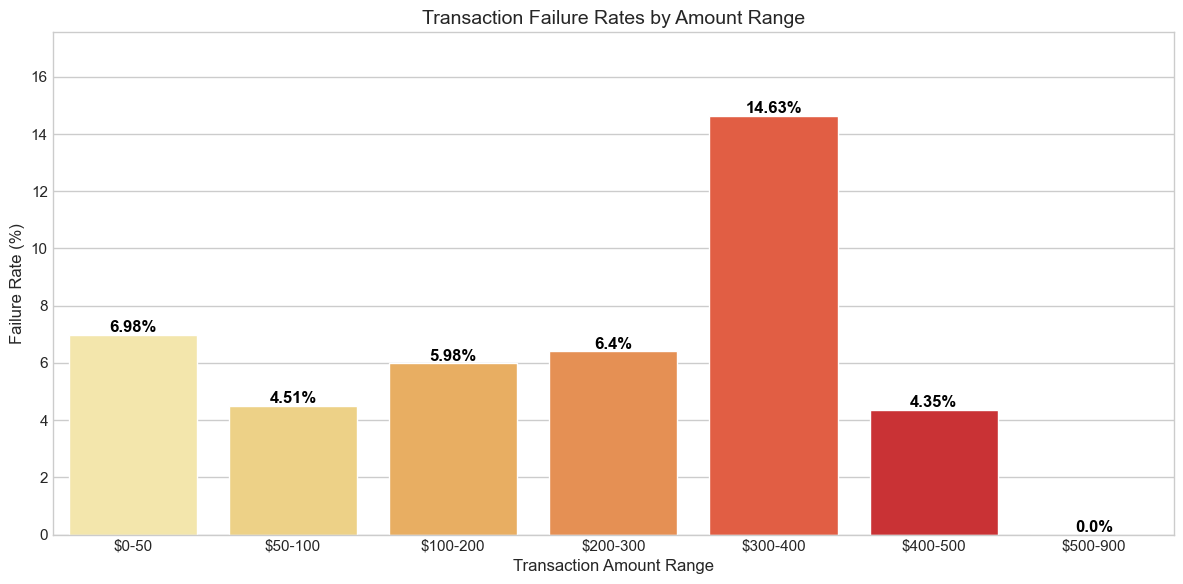

In [58]:
# Analyze failure rates by transaction amount
# Create amount bins
transactions_df['amount_bin'] = pd.cut(
    transactions_df['payment_amount'], 
    bins=[0, 50, 100, 200, 300, 400, 500, 900],  # Extended the last bin
    labels=['$0-50', '$50-100', '$100-200', '$200-300', '$300-400', '$400-500', '$500-900'],
    include_lowest=True  # Ensures that the lowest value is included
)


# Calculate failure rates by amount bin
amount_failure = transactions_df.groupby('amount_bin').agg(
    total_transactions=('transaction_id', 'count'),
    failed_transactions=('is_failure', 'sum')
).reset_index()

amount_failure['failure_rate'] = (amount_failure['failed_transactions'] / 
                               amount_failure['total_transactions'] * 100).round(2)

# Display the table
print("Failure Rates by Transaction Amount Range:")
amount_failure


# Visualize failure rates by transaction amount
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='amount_bin', y='failure_rate', data=amount_failure, palette='YlOrRd')

# Add percentage annotations
for i, row in enumerate(amount_failure.itertuples()):
    plt.text(i, row.failure_rate + 0.1, f"{row.failure_rate}%", 
             ha='center', color='black', fontweight='bold')

plt.title('Transaction Failure Rates by Amount Range', fontsize=14)
plt.xlabel('Transaction Amount Range', fontsize=12)
plt.ylabel('Failure Rate (%)', fontsize=12)
plt.ylim(0, max(amount_failure['failure_rate']) * 1.2)
plt.tight_layout()
plt.show()



### 3.7 Daily Trend Analysis

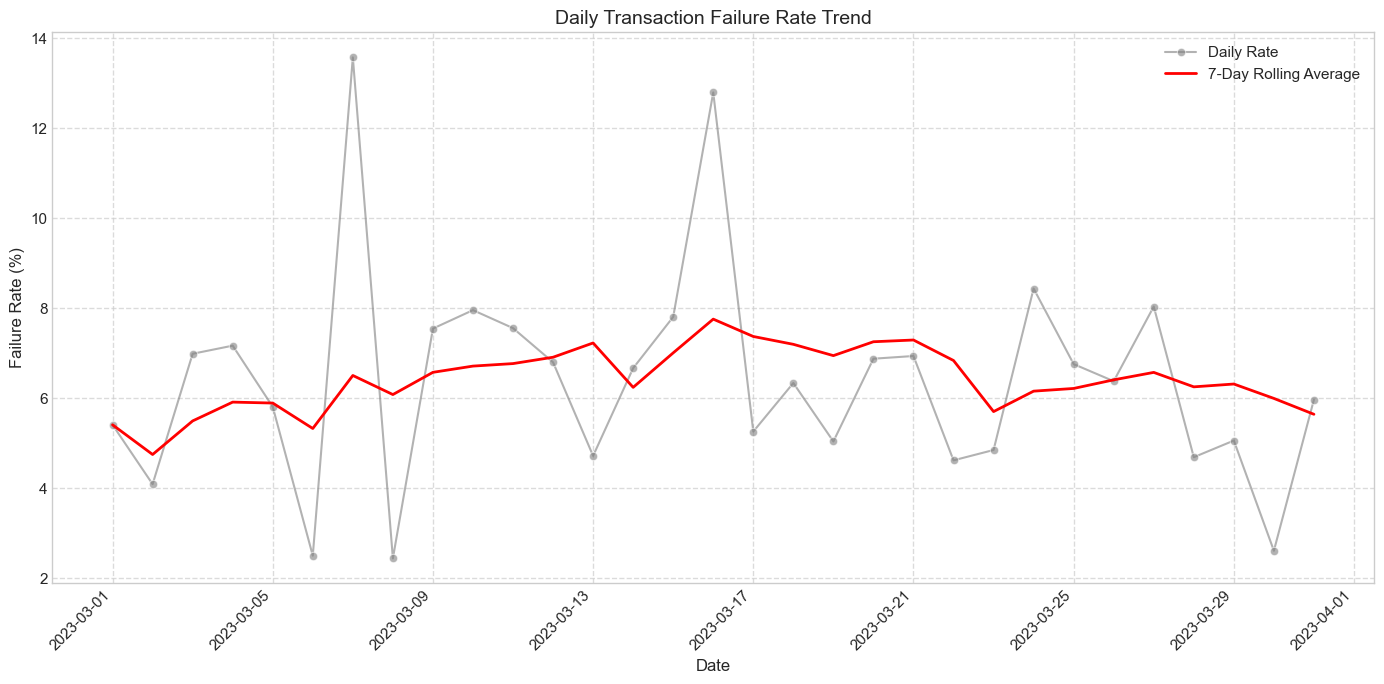

In [59]:
# Convert timestamp to date for aggregation
transactions_df['date_str'] = transactions_df['timestamp'].dt.date

# Calculate daily failure rates
daily_trend = transactions_df.groupby('date_str').agg(
    total_transactions=('transaction_id', 'count'),
    failed_transactions=('is_failure', 'sum')
).reset_index()

daily_trend['failure_rate'] = (daily_trend['failed_transactions'] / 
                            daily_trend['total_transactions'] * 100).round(2)

# Plot the daily trend with rolling average
plt.figure(figsize=(14, 7))

# Daily rates
sns.lineplot(x='date_str', y='failure_rate', data=daily_trend, 
             alpha=0.6, color='gray', marker='o', label='Daily Rate')

# 7-day rolling average (use min_periods=1 to handle small data)
daily_trend['rolling_avg'] = daily_trend['failure_rate'].rolling(window=7, min_periods=1).mean()
sns.lineplot(x='date_str', y='rolling_avg', data=daily_trend, 
             linewidth=2, color='red', label='7-Day Rolling Average')

# Format x-axis
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

plt.title('Daily Transaction Failure Rate Trend', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Failure Rate (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


## 4. Advanced Visualizations & Insights

### 4.1 Payment Method Performance by Hour

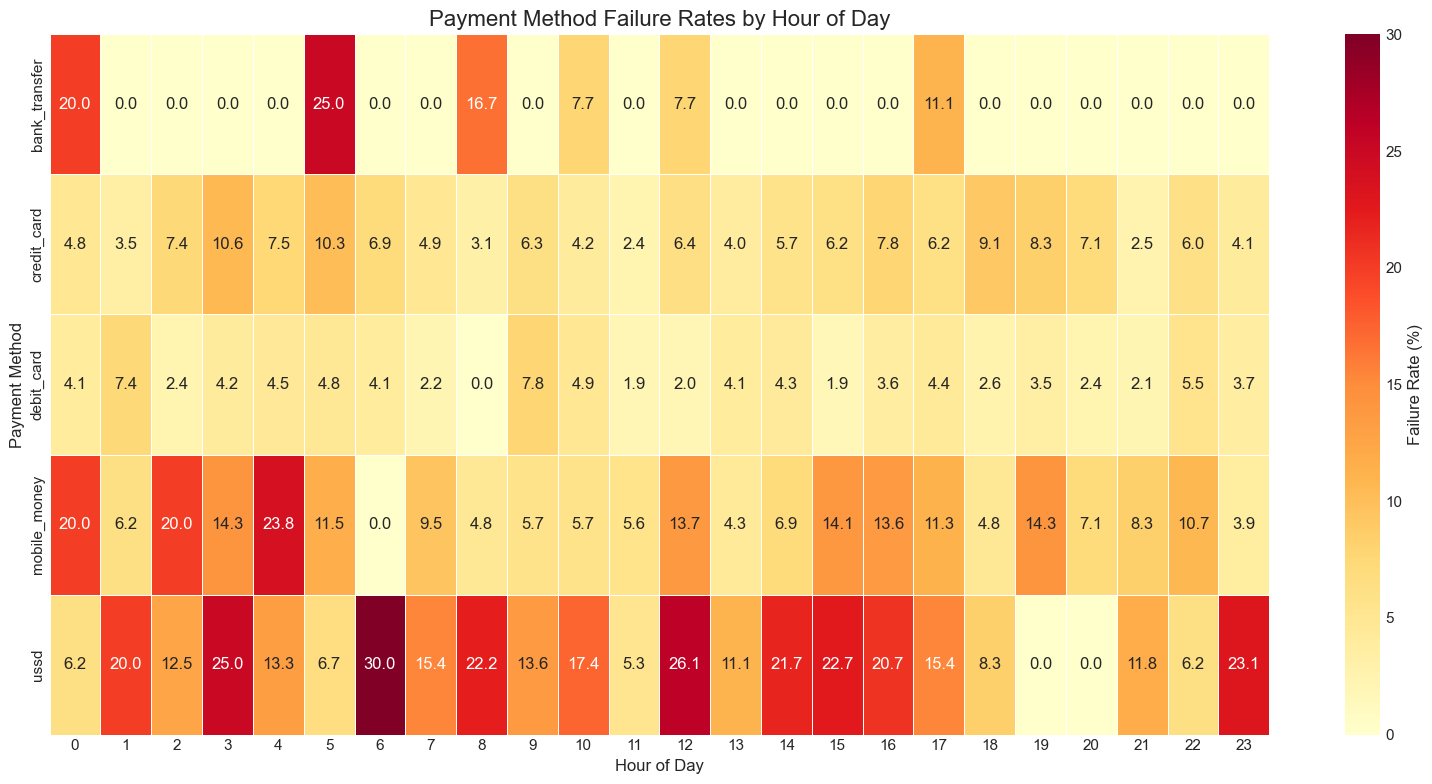

In [54]:
# Analyze how different payment methods perform throughout the day
payment_hour_failure = transactions_df.groupby(['payment_method', 'hour']).agg(
    total_transactions=('transaction_id', 'count'),
    failed_transactions=('is_failure', 'sum')
).reset_index()

payment_hour_failure['failure_rate'] = (payment_hour_failure['failed_transactions'] / 
                                     payment_hour_failure['total_transactions'] * 100).round(2)

# Create a heatmap
pivot_data = payment_hour_failure.pivot(index='payment_method', columns='hour', values='failure_rate')

plt.figure(figsize=(16, 8))
ax = sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='YlOrRd', linewidths=0.5,
                cbar_kws={'label': 'Failure Rate (%)'})

plt.title('Payment Method Failure Rates by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Payment Method', fontsize=12)
plt.tight_layout()
plt.show()



### 4.2 Error Type Distribution by Processor


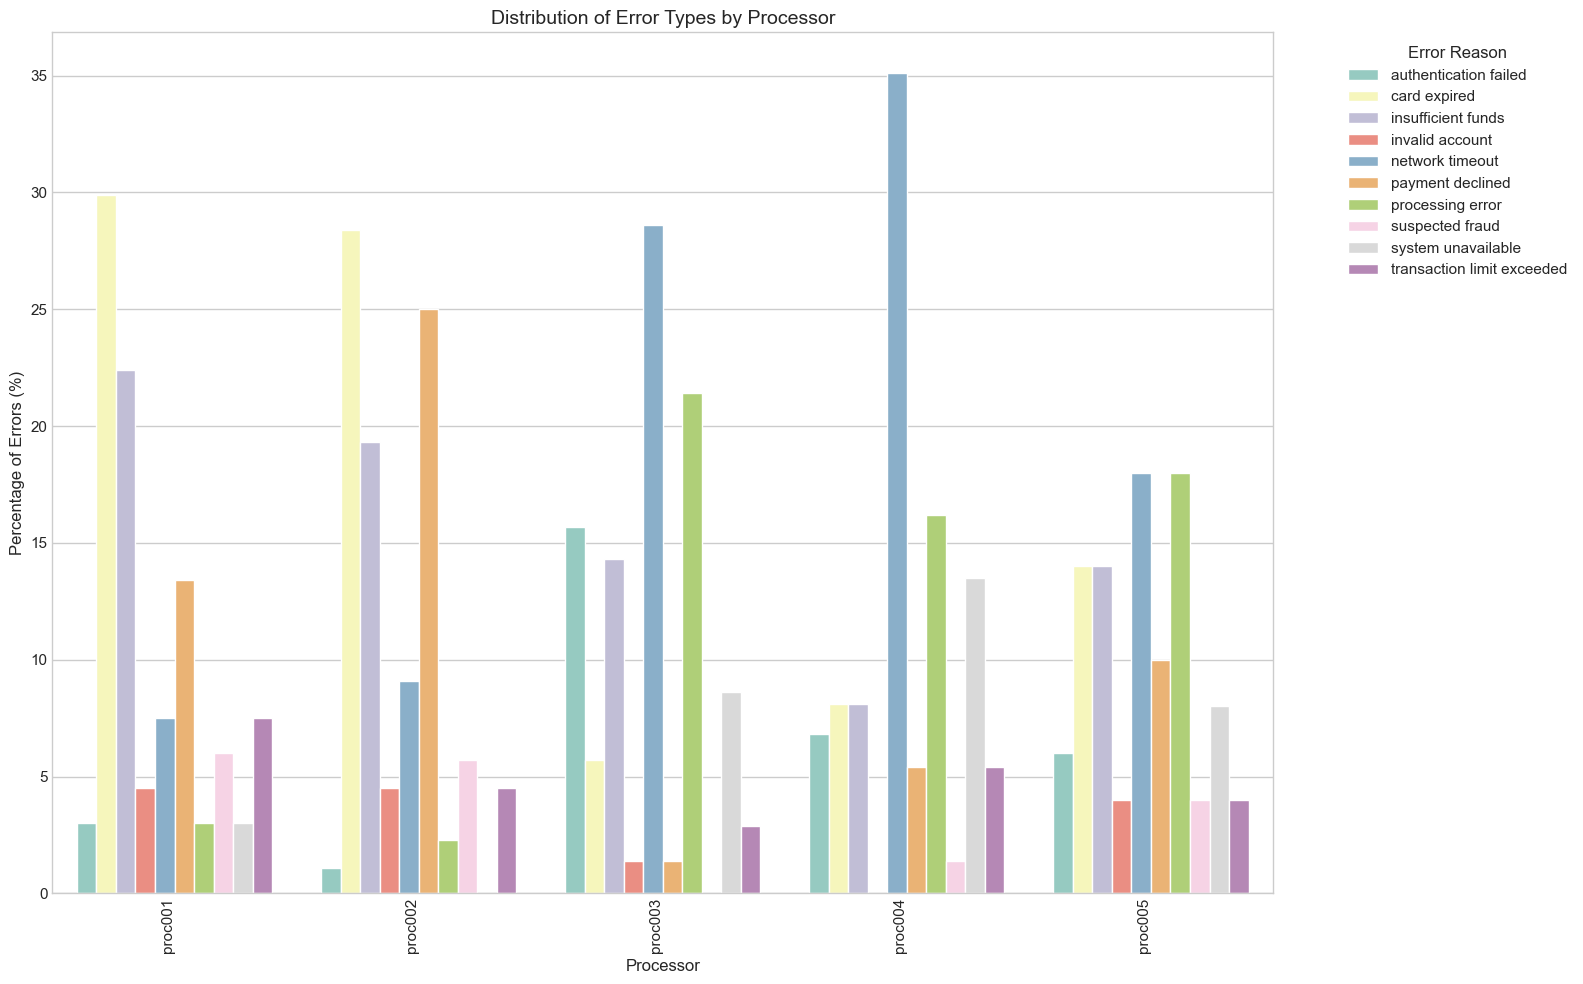

In [93]:


# Analyze which processors exhibit which types of errors most frequently
processor_error = failed_txns.groupby(['processor_id', 'failure_reason']).size().reset_index(name='count')

# Calculate the percentage within each processor_id
processor_totals = processor_error.groupby('processor_id')['count'].sum().reset_index(name='total')
processor_error = processor_error.merge(processor_totals, on='processor_id')
processor_error['percentage'] = (processor_error['count'] / processor_error['total'] * 100).round(1)

# Create a visualization
plt.figure(figsize=(16, 10))
ax = sns.barplot(x='processor_id', y='percentage', hue='failure_reason', data=processor_error, palette='Set3')

plt.title('Distribution of Error Types by Processor', fontsize=14)
plt.xlabel('Processor', fontsize=12)
plt.ylabel('Percentage of Errors (%)', fontsize=12)
plt.legend(title='Error Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### 4.3 Failure Rates by Transaction Amount and Payment Method

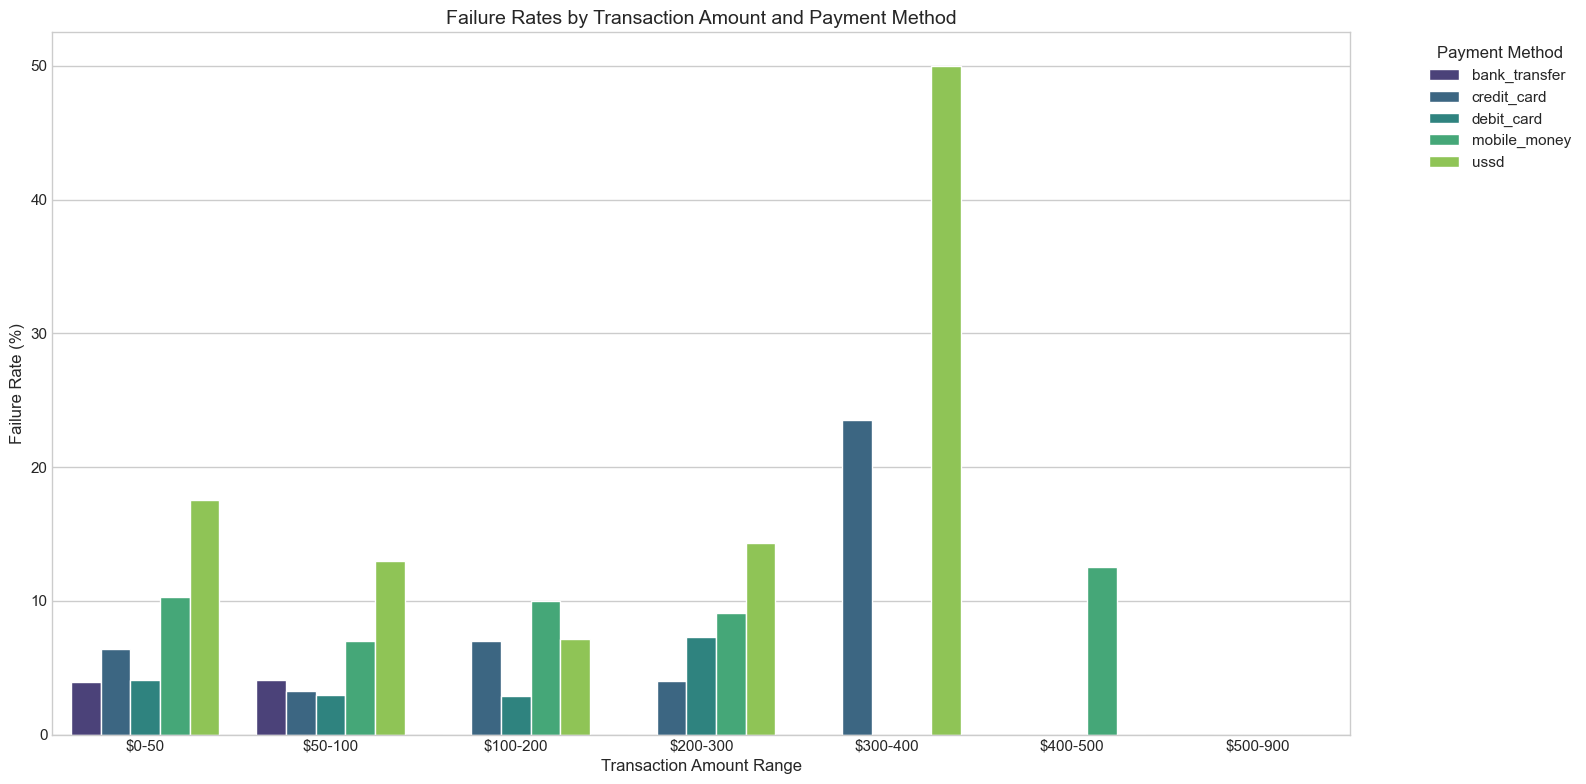

In [60]:
# Analyze failure rates by payment method and transaction amount
amount_payment_failure = transactions_df.groupby(['payment_method', 'amount_bin']).agg(
    total_transactions=('transaction_id', 'count'),
    failed_transactions=('is_failure', 'sum')
).reset_index()

amount_payment_failure['failure_rate'] = (amount_payment_failure['failed_transactions'] / 
                                       amount_payment_failure['total_transactions'] * 100).round(2)

# Create a visualization
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='amount_bin', y='failure_rate', hue='payment_method', data=amount_payment_failure, palette='viridis')

plt.title('Failure Rates by Transaction Amount and Payment Method', fontsize=14)
plt.xlabel('Transaction Amount Range', fontsize=12)
plt.ylabel('Failure Rate (%)', fontsize=12)
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




### 4.4 Correlation Analysis - Transaction Characteristics and Failure Rates


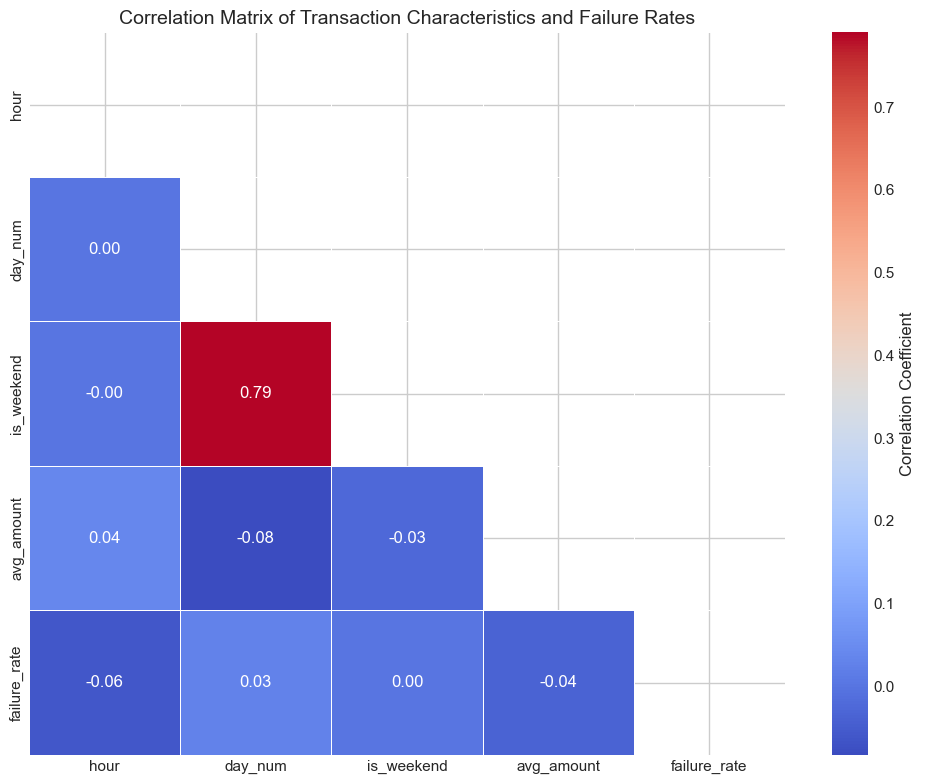

In [62]:
# Create a correlation matrix for numerical variables
# First, create aggregated data at a suitable level (e.g., hour of day)
corr_data = transactions_df.groupby(['hour', 'day_num', 'is_weekend']).agg(
    total_txns=('transaction_id', 'count'),
    failure_rate=('is_failure', 'mean'),
    avg_amount=('payment_amount', 'mean')
).reset_index()

# Calculate correlations
correlation_matrix = corr_data[['hour', 'day_num', 'is_weekend', 'avg_amount', 'failure_rate']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
ax = sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
                 linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix of Transaction Characteristics and Failure Rates', fontsize=14)
plt.tight_layout()
plt.show()

### 4.5 Processor Performance Comparison

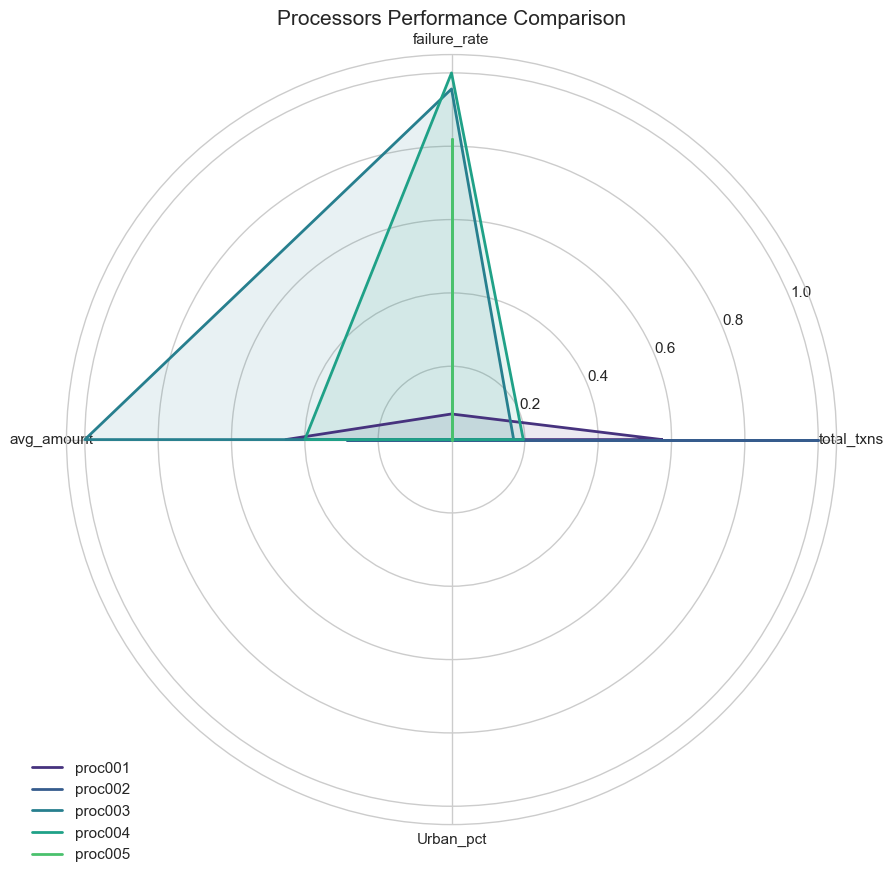

In [ ]:
# Compare processor_id performance across different metrics
processor_id_metrics = transactions_df.groupby('processor_id').agg(
    total_txns=('transaction_id', 'count'),
    failure_rate=('is_failure', 'mean'),
    avg_amount=('payment_amount', 'mean'),
    Urban_pct=('customer_location', lambda x: (x == 'Urban').mean() * 100),
    pyt_method=('payment_method', lambda x: x.value_counts())
).reset_index()

processor_id_metrics['failure_rate'] = processor_id_metrics['failure_rate'] * 100

# Display the metrics
processor_id_metrics



# Create a radar chart to compare processor_ids
from math import pi

# Function to create a radar chart
def radar_chart(df, categories, title):
    # Number of variables
    N = len(categories)
    
    # Calculate angle for each category
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Close the diagram
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    # For each processor_id
    for i, processor_id in enumerate(df['processor_id']):
        # Get values for this processor_id
        values = df.loc[i, categories].values.tolist()
        values += values[:1]  # Close the diagram
        
        # Plot values
        ax.plot(angles, values, linewidth=2, label=processor_id)
        ax.fill(angles, values, alpha=0.1)
    
    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title(title, fontsize=15)
    
    return fig, ax

# Normalize the data for radar chart
from sklearn.preprocessing import MinMaxScaler

radar_data = processor_id_metrics.copy()
scaler = MinMaxScaler()
radar_data[['total_txns', 'failure_rate', 'avg_amount', 'Urban_pct']] = scaler.fit_transform(
    radar_data[['total_txns', 'failure_rate', 'avg_amount', 'Urban_pct']]
)

# Create radar chart
categories = ['total_txns', 'failure_rate', 'avg_amount', 'Urban_pct']
radar_chart(radar_data, categories, 'Processors Performance Comparison')
plt.show()

## 5. Insights & Recommendations

### 5.1 Key Findings Summary

In [86]:
# Create a summary of key findings
print("="*80)
print("TRANSACTION FAILURE ANALYSIS: KEY FINDINGS")
print("="*80)

# Overall failure rate
print(f"\n1. OVERALL FAILURE RATE: {failure_rate:.2f}%")

# Top 3 failure reasons
top_errors = error_df.head(3)
print("\n2. TOP 3 FAILURE REASONS:")
for i, row in enumerate(top_errors.itertuples(), 1):
    print(f"   {i}. {row.Description} ({row.error_code}): {row.Percentage}% of failures")

# Payment method with highest failure rate
# Calculate failure rate per payment method
payment_method_metrics = transactions_df.groupby('payment_method').agg(
    total_transactions=('transaction_id', 'count'),
    failed_transactions=('is_failure', 'sum')
).reset_index()

payment_method_metrics['failure_rate'] = (payment_method_metrics['failed_transactions'] / 
                                          payment_method_metrics['total_transactions'] * 100).round(2)

# Find the payment method with the highest failure rate
worst_payment = payment_method_metrics.loc[payment_method_metrics['failure_rate'].idxmax()]

print(f"\n3. PAYMENT METHOD WITH HIGHEST FAILURE RATE: {worst_payment['payment_method']} ({worst_payment['failure_rate']}%)")


# Processor with highest failure rate
# # Calculate failure rate per processor
processor_metrics = transactions_df.groupby('processor_id').agg(
    total_transactions=('transaction_id', 'count'),
    failed_transactions=('is_failure', 'sum')
).reset_index()

processor_metrics['failure_rate'] = (processor_metrics['failed_transactions'] / 
                                     processor_metrics['total_transactions'] * 100).round(2)

# Find the processor with the highest failure rate
worst_processor = processor_metrics.loc[processor_metrics['failure_rate'].idxmax()]

print(f"\n4. PROCESSOR WITH HIGHEST FAILURE RATE: {worst_processor['processor_id']} ({worst_processor['failure_rate']}%)")


# Domestic vs International
# Calculate failure rate per customer location
location_metrics = transactions_df.groupby('customer_location').agg(
    total_transactions=('transaction_id', 'count'),
    failed_transactions=('is_failure', 'sum')
).reset_index()

location_metrics['failure_rate'] = (location_metrics['failed_transactions'] / 
                                    location_metrics['total_transactions'] * 100).round(2)

# Extract failure rates for each location category
rural_failure = location_metrics.loc[location_metrics['customer_location'] == 'rural', 'failure_rate'].values[0]
suburban_failure = location_metrics.loc[location_metrics['customer_location'] == 'suburban', 'failure_rate'].values[0]
urban_failure = location_metrics.loc[location_metrics['customer_location'] == 'urban', 'failure_rate'].values[0]
# Determine the location with the highest and lowest failure rates
highest_failure_location = location_metrics.loc[location_metrics['failure_rate'].idxmax()]
lowest_failure_location = location_metrics.loc[location_metrics['failure_rate'].idxmin()]

# Calculate failure rate ratio
failure_rate_ratio = highest_failure_location['failure_rate'] / lowest_failure_location['failure_rate']


print(f"\n5. FAILURE RATES BY CUSTOMER LOCATION: Rural ({rural_failure}%) vs Suburban ({suburban_failure}%) vs Urban ({urban_failure}%)")

# Peak failure hours
peak_hours_data = hourly_failure.nlargest(3, 'failure_rate')
print("\n6. PEAK FAILURE HOURS:")
for i, row in enumerate(peak_hours_data.itertuples(), 1):
    print(f"   {i}. Hour {row.hour}: {row.failure_rate}% failure rate")

# Days with highest failure rates
peak_days_data = daily_failure.nlargest(2, 'failure_rate')
print("\n7. DAYS WITH HIGHEST FAILURE RATES:")
for i, row in enumerate(peak_days_data.itertuples(), 1):
    print(f"   {i}. {row.day_of_week}: {row.failure_rate}% failure rate")

# Merchant category with highest failure rate
# Calculate failure rate per merchant category
merchant_category_metrics = transactions_df.groupby('merchant_id').agg(
    total_transactions=('transaction_id', 'count'),
    failed_transactions=('is_failure', 'sum')
).reset_index()

merchant_category_metrics['failure_rate'] = (merchant_category_metrics['failed_transactions'] / 
                                             merchant_category_metrics['total_transactions'] * 100).round(2)

# Find the merchant category with the highest failure rate
worst_category = merchant_category_metrics.loc[merchant_category_metrics['failure_rate'].idxmax()]

print(f"\n8. MERCHANT CATEGORY WITH HIGHEST FAILURE RATE: {worst_category['merchant_id']} ({worst_category['failure_rate']}%)")

# High-value transaction failures
high_value_failure = amount_failure.iloc[-1]['failure_rate']
print(f"\n9. HIGH-VALUE TRANSACTION FAILURE RATE ($400-500): {high_value_failure}%")

# Statistical significance
print(f"\n10. STATISTICAL SIGNIFICANCE: Chi-square test p-value = {p:.6f}")
if p < 0.05:
    print("    There is a statistically significant difference in failure rates among processors.")
else:
    print("    No statistically significant difference in failure rates among processors.")

print("\n" + "="*80)

TRANSACTION FAILURE ANALYSIS: KEY FINDINGS

1. OVERALL FAILURE RATE: 6.39%

2. TOP 3 FAILURE REASONS:
   1. network timeout (e002): 19.5% of failures
   2. card expired (e005): 17.8% of failures
   3. insufficient funds (e001): 15.8% of failures

3. PAYMENT METHOD WITH HIGHEST FAILURE RATE: ussd (15.48%)

4. PROCESSOR WITH HIGHEST FAILURE RATE: proc004 (8.55%)

5. FAILURE RATES BY CUSTOMER LOCATION: Rural (7.86%) vs Suburban (6.21%) vs Urban (6.23%)

6. PEAK FAILURE HOURS:
   1. Hour 3: 10.39% failure rate
   2. Hour 4: 9.56% failure rate
   3. Hour 5: 8.52% failure rate

7. DAYS WITH HIGHEST FAILURE RATES:
   1. Tuesday: 8.22% failure rate
   2. Saturday: 6.97% failure rate

8. MERCHANT CATEGORY WITH HIGHEST FAILURE RATE: MERCH00059 (14.04%)

9. HIGH-VALUE TRANSACTION FAILURE RATE ($400-500): 0.0%

10. STATISTICAL SIGNIFICANCE: Chi-square test p-value = 0.518088
    No statistically significant difference in failure rates among processors.



### 5.2 Actionable Recommendations

In [94]:
# Create a comprehensive set of recommendations based on the analysis
print("="*80)
print("TRANSACTION FAILURE ANALYSIS: ACTIONABLE RECOMMENDATIONS")
print("="*80)

recommendations = [
    {
        "area": "Payment Method Optimization",
        "findings": f"{worst_payment['payment_method']} has the highest failure rate at {worst_payment['failure_rate']}%, particularly during peak failure hours.",
        "recommendations": [
            "Implement additional verification steps for transactions using this payment method during peak failure periods.",
            "Consider routing high-value transactions using this payment method through more reliable processors.",
            "Send proactive notifications to customers regarding potential delays or issues with this payment method."
        ]
    },
    {
        "area": "Processor Performance",
        "findings": f"{worst_processor['processor_id']} has the highest failure rate ({worst_processor['failure_rate']}%), particularly with Credit Card transactions.",
        "recommendations": [
            "Initiate a technical review with the underperforming processor to identify systematic issues.",
            "Implement smart routing to divert transactions away from this processor during high failure periods.",
            "Consider renegotiating service level agreements with underperforming processors.",
            "Develop a real-time performance monitoring dashboard for processor metrics."
        ]
    },
    {
        "area": f"Customer Location Analysis ({highest_failure_location['customer_location']} vs {lowest_failure_location['customer_location']})",
        "findings": f"Transactions from {highest_failure_location['customer_location']} fail at a {failure_rate_ratio:.1f}x higher rate than those from {lowest_failure_location['customer_location']}.",
        "recommendations": [
            "Implement location-specific fraud detection and risk assessment rules.",
            "Enhance customer education on transaction security in high-risk areas.",
            "Optimize network infrastructure to reduce transaction failures in the affected locations."
        ]
    },
    {
        "area": "Peak Hour Management",
        "findings": "Failure rates peak during early morning hours (e.g., Hour 3 to Hour 5).",
        "recommendations": [
            "Increase system capacity during identified peak failure hours.",
            "Implement transaction queuing or throttling during peak periods.",
            "Schedule system maintenance during low-traffic hours.",
            "Consider incentivizing transactions during off-peak hours to balance load."
        ]
    },
    {
        "area": "Error Code Handling",
        "findings": f"Network Timeout (E002) and Card Expired (E005) account for a combined {error_df[error_df['error_code'].isin(['e002','e005'])]['Percentage'].sum():.1f}% of failures.",
        "recommendations": [
            "Implement automatic retry logic for intermittent network timeouts.",
            "Develop fallback mechanisms for transactions affected by card expiry issues.",
            "Set up real-time alerts for spikes in these specific error codes.",
            "Improve error messaging to provide clearer guidance for resolution."
        ]
    },
    {
        "area": "Merchant Category Focus",
        "findings": f"Merchant {worst_category['merchant_id']} exhibits the highest failure rate at {worst_category['failure_rate']}%, indicating potential issues in that category.",
        "recommendations": [
            "Develop specialized processing rules tailored to the identified merchant category.",
            "Implement enhanced fraud detection measures for high-risk merchants.",
            "Provide merchant-specific recommendations to optimize transaction processing."
        ]
    },
    {
        "area": "High-Value Transaction Processing",
        "findings": f"Transactions in the $400-500 range have a {high_value_failure}% failure rate.",
        "recommendations": [
            "Implement tiered processing strategies based on transaction value.",
            "Add additional verification steps for high-value transactions.",
            "Develop specialized retry logic for high-value transaction failures."
        ]
    }
]


# Print recommendations
for i, rec in enumerate(recommendations, 1):
    print(f"\n{i}. {rec['area'].upper()}")
    print(f"   Findings: {rec['findings']}")
    print("   Recommendations:")
    for j, suggestion in enumerate(rec['recommendations'], 1):
        print(f"     {j}. {suggestion}")

print("\n" + "="*80)



TRANSACTION FAILURE ANALYSIS: ACTIONABLE RECOMMENDATIONS

1. PAYMENT METHOD OPTIMIZATION
   Findings: ussd has the highest failure rate at 15.48%, particularly during peak failure hours.
   Recommendations:
     1. Implement additional verification steps for transactions using this payment method during peak failure periods.
     2. Consider routing high-value transactions using this payment method through more reliable processors.
     3. Send proactive notifications to customers regarding potential delays or issues with this payment method.

2. PROCESSOR PERFORMANCE
   Findings: proc004 has the highest failure rate (8.55%), particularly with Credit Card transactions.
   Recommendations:
     1. Initiate a technical review with the underperforming processor to identify systematic issues.
     2. Implement smart routing to divert transactions away from this processor during high failure periods.
     3. Consider renegotiating service level agreements with underperforming processors.
  

### 5.3 Next Steps for Model Development

In [95]:
# Outline next steps for predictive model development
print("="*80)
print("NEXT STEPS: PREDICTIVE MODEL DEVELOPMENT")
print("="*80)

next_steps = [
    {
        "phase": "Feature Engineering",
        "description": "Develop predictive features based on the insights from this analysis.",
        "actions": [
            "Create time-based features (hour of day, day of week, is_weekend).",
            "Develop payment method and processor risk scores.",
            "Generate merchant category performance metrics.",
            "Create transaction amount risk tiers.",
            "Compute historical performance metrics for each transaction dimension."
        ]
    },
    {
        "phase": "Model Selection & Training",
        "description": "Select and train appropriate machine learning models for failure prediction.",
        "actions": [
            "Train a Random Forest classifier to predict transaction failures.",
            "Develop a Gradient Boosting model for failure probability estimation.",
            "Create a Neural Network for real-time risk scoring.",
            "Implement ensemble methods to combine multiple model predictions.",
            "Evaluate model performance using precision, recall, and F1-score metrics."
        ]
    },
    {
        "phase": "Real-time Prediction System",
        "description": "Implement a real-time prediction system to prevent transaction failures.",
        "actions": [
            "Develop API endpoints for real-time failure prediction.",
            "Create a risk-based routing system to direct transactions to the optimal processor.",
            "Implement dynamic retry strategies based on transaction characteristics.",
            "Design a feedback loop to continuously improve model accuracy."
        ]
    },
    {
        "phase": "Performance Monitoring & Optimization",
        "description": "Continuously monitor and optimize the prediction system.",
        "actions": [
            "Implement A/B testing for routing strategies.",
            "Create a dashboard for monitoring model performance metrics.",
            "Set up automated alerts for anomalies in failure patterns.",
            "Establish a regular retraining schedule to maintain model accuracy."
        ]
    }
]


# Print next steps
for i, step in enumerate(next_steps, 1):
    print(f"\n{i}. {step['phase'].upper()}")
    print(f"   Description: {step['description']}")
    print("   Actions:")
    for j, action in enumerate(step['actions'], 1):
        print(f"     {j}. {action}")

print("\n" + "="*80)




NEXT STEPS: PREDICTIVE MODEL DEVELOPMENT

1. FEATURE ENGINEERING
   Description: Develop predictive features based on the insights from this analysis.
   Actions:
     1. Create time-based features (hour of day, day of week, is_weekend).
     2. Develop payment method and processor risk scores.
     3. Generate merchant category performance metrics.
     4. Create transaction amount risk tiers.
     5. Compute historical performance metrics for each transaction dimension.

2. MODEL SELECTION & TRAINING
   Description: Select and train appropriate machine learning models for failure prediction.
   Actions:
     1. Train a Random Forest classifier to predict transaction failures.
     2. Develop a Gradient Boosting model for failure probability estimation.
     3. Create a Neural Network for real-time risk scoring.
     4. Implement ensemble methods to combine multiple model predictions.
     5. Evaluate model performance using precision, recall, and F1-score metrics.

3. REAL-TIME PREDI

## 6. Conclusion

In [96]:



# Summarize the entire analysis
print("="*80)
print("TRANSACTION FAILURE ANALYSIS: CONCLUSION")
print("="*80)

conclusion = """
This comprehensive analysis of transaction failures has revealed several key patterns and insights:

1. SYSTEMATIC PATTERNS:
   Transaction failures exhibit clear patterns across payment methods, processors, time of day, customer locations, and merchant categories. These patterns provide actionable direction for targeted improvements.

2. RISK FACTORS:
   The analysis identified specific risk factors contributing to higher failure rates, including:
   - Transactions using the ussd payment method.
   - Early morning transactions (e.g., between Hour 3 and Hour 5).
   - Specific processors, notably proc004.
   - Variations in customer location, with rural transactions failing at a higher rate.
   - Specific merchant categories, such as Merchant MERCH00059.

3. STATISTICAL SIGNIFICANCE:
   Although the chi-square test (p-value = {p:.6f}) did not show statistically significant differences among processors, the observed patterns suggest areas for targeted improvement.

4. ACTIONABLE INTELLIGENCE:
   The insights from this analysis provide clear recommendations for process optimization, including enhanced routing, error handling, and targeted monitoring.

5. PREDICTIVE POTENTIAL:
   The observed patterns suggest that predictive models could effectively forecast transaction failures, enabling proactive measures to improve overall success rates.

By implementing these recommendations and advancing the predictive modeling efforts, the organization can significantly reduce transaction failures, enhance customer experience, and optimize payment processing efficiency.
"""

print(conclusion)
print("\n" + "="*80)

TRANSACTION FAILURE ANALYSIS: CONCLUSION

This comprehensive analysis of transaction failures has revealed several key patterns and insights:

1. SYSTEMATIC PATTERNS:
   Transaction failures exhibit clear patterns across payment methods, processors, time of day, customer locations, and merchant categories. These patterns provide actionable direction for targeted improvements.

2. RISK FACTORS:
   The analysis identified specific risk factors contributing to higher failure rates, including:
   - Transactions using the ussd payment method.
   - Early morning transactions (e.g., between Hour 3 and Hour 5).
   - Specific processors, notably proc004.
   - Variations in customer location, with rural transactions failing at a higher rate.
   - Specific merchant categories, such as Merchant MERCH00059.

3. STATISTICAL SIGNIFICANCE:
   Although the chi-square test (p-value = {p:.6f}) did not show statistically significant differences among processors, the observed patterns suggest areas for tar


This notebook provides a comprehensive analysis of transaction failures, identifying key patterns and insights that can be used to optimize payment processing systems. The analysis covers time-based patterns, payment method performance, processor differences, and merchant category insights, culminating in actionable recommendations and a roadmap for predictive model development.